In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geant4_name = "improved_200cells_FPCD.hdf5"
diffusion_name = "GSGM.h5"

g4 = h5py.File(geant4_name, 'r')
dfsn = h5py.File(diffusion_name,'r')

g4.keys()
#dfsn.keys()

nevts = 10_000

(array([1.60000e+01, 2.40000e+01, 1.33000e+02, 6.78000e+02, 1.00770e+04,
        1.91998e+05, 4.37478e+05, 5.06610e+05, 4.58118e+05, 1.88568e+05]),
 array([-4.436269  , -3.9482012 , -3.4601336 , -2.972066  , -2.4839983 ,
        -1.9959306 , -1.5078629 , -1.0197953 , -0.5317276 , -0.04365998,
         0.44440767], dtype=float32),
 <BarContainer object of 10 artists>)

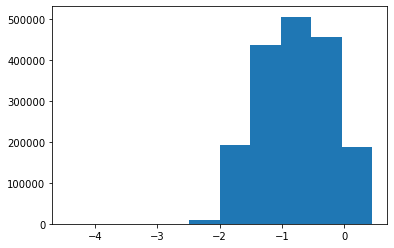

In [3]:
plt.hist((np.log10(g4['cluster'][:,2])))

In [4]:
print(np.shape(dfsn['cell_features']))
print(np.shape(g4['hcal_cells']))

(10000, 200, 4)
(1793700, 200, 5)


In [5]:
g4_cellsE = np.ravel(g4['hcal_cells'][:nevts,:,0])
dfsn_cellsE = np.ravel(dfsn['cell_features'][:,:,0])

mask = g4_cellsE != 0.0
mask_dfsn = dfsn_cellsE != 0



In [6]:
print(np.min(g4_cellsE[mask]))

3.0517578e-05


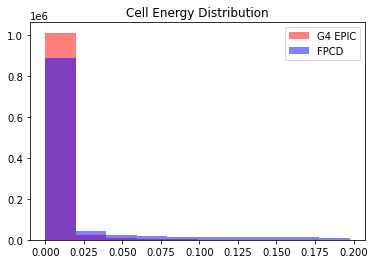

In [7]:
cellsE_bins = np.linspace(0,0.001,20)
plt.hist(np.ravel(g4_cellsE[mask]),alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(10**dfsn_cellsE[mask_dfsn]),alpha=0.5,label="FPCD",color="blue")
#plt.ylim(0,0.2e6)
plt.legend()
_ = plt.title("Cell Energy Distribution")
plt.savefig("CellE.pdf")

In [8]:
print(g4_cellsE[mask]==0)

[False False False ... False False False]


#x_mask = (dfsn_cellsX[dfsn_cellsX<-100])
x_mask = np.abs(dfsn_cellsX)>100

#x_mask = (dfsn_cellsX[dfsn_cellsX>100])
#np.append(x_mask,(dfsn_cellsX[dfsn_cellsX>100]))
#np.concatenate((x_mask,dfsn_cellsX[dfsn_cellsX>100]),axis=0)
plt.hist(dfsn_cellsX[x_mask],bins=150)

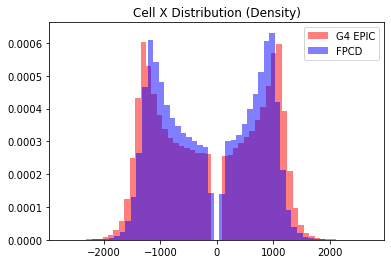

In [9]:
g4_cellsX = np.ravel(g4['hcal_cells'][:nevts,:,1])
dfsn_cellsX = np.ravel(dfsn['cell_features'][:,:,1])

g4_cellsX = g4_cellsX[g4_cellsX != 0]
dfsn_cellsX = dfsn_cellsX[dfsn_cellsX != 0]

#cellsE_bins = np.linspace(0,0.001,1000)
x_mask = np.abs(dfsn_cellsX)>=100
plt.hist(np.ravel(g4_cellsX),bins=55,alpha=0.5,label="G4 EPIC",color="red",density=True)
plt.hist(np.ravel(dfsn_cellsX[x_mask]),bins=55,alpha=0.5,label="FPCD",color="blue",density=True)
plt.legend()
_ = plt.title("Cell X Distribution (Density)")
plt.savefig("CellX.pdf")

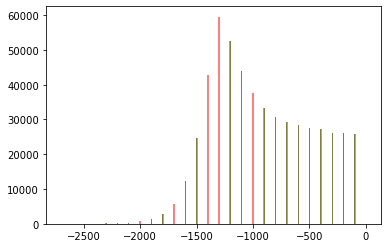

In [10]:
#plt.hist(np.ravel(dfsn_cellsX),bins=np.linspace,alpha=0.5,label="FPCD",color="blue")
_ = plt.hist(np.ravel(g4_cellsX),bins=np.linspace(-2700,-90,260),alpha=0.5,label="G4 EPIC",color="red")
_ = plt.hist(np.ravel(g4_cellsX),bins=np.linspace(-2700,-0,270),alpha=0.5,label="G4 EPIC",color="green")

In [11]:
g4_test = g4_cellsX[g4_cellsX<0]
print(np.max(g4_test))

-100.0


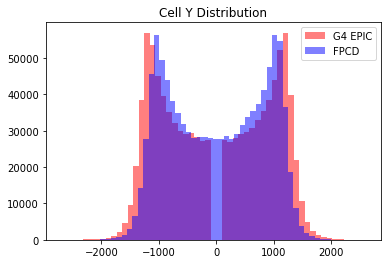

In [12]:
g4_cellsY = np.ravel(g4['hcal_cells'][:nevts,:,2])
dfsn_cellsY = np.ravel(dfsn['cell_features'][:,:,2])

g4_cellsY = g4_cellsY[g4_cellsY != 0]
dfsn_cellsY = dfsn_cellsY[dfsn_cellsY != 0]

#cellsE_bins = np.linspace(0,0.001,1000)
plt.hist(np.ravel(g4_cellsY),bins=55,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsY),bins=55,alpha=0.5,label="FPCD",color="blue")
plt.legend()
_ = plt.title("Cell Y Distribution")
plt.savefig("CellY.pdf")

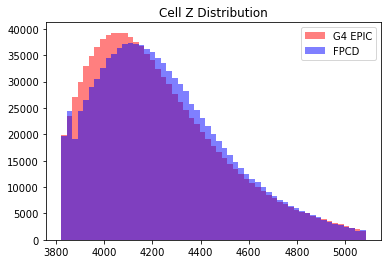

In [13]:
g4_cellsZ = np.ravel(g4['hcal_cells'][:nevts,:,3])
dfsn_cellsZ = np.ravel(dfsn['cell_features'][:,:,3])

g4_cellsZ = g4_cellsZ[g4_cellsZ != 0]
dfsn_cellsZ = dfsn_cellsZ[dfsn_cellsZ != 0]

cellsz_bins = np.linspace(3600,5000,61)
plt.hist(np.ravel(g4_cellsZ),bins=55,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsZ),bins=55,alpha=0.5,label="FPCD",color="blue")
plt.legend()
_ = plt.title("Cell Z Distribution")
plt.savefig("CellZ.pdf")

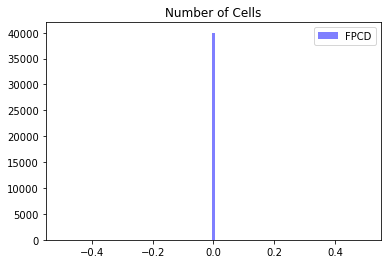

In [14]:
g4_NCells = np.ravel(g4['cluster'][:nevts,-1])
dfsn_NCells = np.ravel(dfsn['cell_features'][:,-1])
                       
#plt.hist(np.ravel(g4_NCells),alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_NCells),bins=93,alpha=0.5,label="FPCD",color="blue")
plt.legend()
plt.title("Number of Cells")
plt.savefig("NCells.pdf")

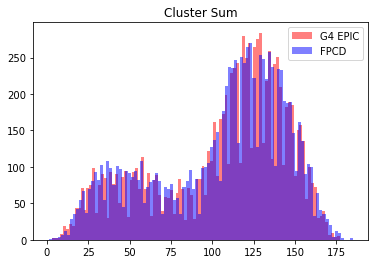

In [19]:
g4_Esum = np.ravel(g4['cluster'][:nevts,3])
dfsn_Esum = np.ravel(dfsn['cluster_features'][:,-1])
                       
plt.hist(np.ravel(g4_Esum),bins=100,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_Esum),bins=100,alpha=0.5,label="FPCD",color="blue")
plt.legend()
plt.title("Cluster Sum")
plt.savefig("ClusterSums.pdf")